In [2]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)
x_train=train_datagen.flow_from_directory(r'D:\Project3-2\dataset\train_set',target_size=(64,64),batch_size=5,color_mode='rgb',class_mode='categorical')
x_test=test_datagen.flow_from_directory(r'D:\Project3-2\dataset\test_set',target_size=(64,64),batch_size=5,color_mode='rgb',class_mode='categorical')

Found 742 images belonging to 4 classes.
Found 197 images belonging to 4 classes.


In [5]:


import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=4,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 5

In [6]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [7]:
model.fit_generator(generator=x_train,steps_per_epoch=len(x_train),epochs=20,validation_data=x_test,validation_steps=len(x_test))

C:\Users\naray\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\training.py:1935: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
149/149 [==============================] - 70s 467ms/step - loss: 1.2095 - accuracy: 0.4515 - val_loss: 1.2786 - val_accuracy: 0.5025
Epoch 2/20
149/149 [==============================] - 49s 329ms/step - loss: 0.8989 - accuracy: 0.6267 - val_loss: 0.9170 - val_accuracy: 0.6142
Epoch 3/20
149/149 [==============================] - 49s 329ms/step - loss: 0.7430 - accuracy: 0.6981 - val_loss: 1.0551 - val_accuracy: 0.5838
Epoch 4/20
149/149 [==============================] - 49s 328ms/step - loss: 0.6335 - accuracy: 0.7507 - val_loss: 0.7844 - val_accuracy: 0.7107
Epoch 5/20
149/149 [==============================] - 49s 332ms/step - loss: 0.6084 - accuracy: 0.7695 - val_loss: 0.9934 - val_accuracy: 0.6599
Epoch 6/20
149/149 [==============================] - 50s 335ms/step - loss: 0.5035 - accuracy: 0.8100 - val_loss: 0.7612 - val_accuracy: 0.7665
Epoch 7/20
149/149 [==============================] - 49s 330ms/step - loss: 0.4694 - accuracy: 0.8235 - val_loss: 0.7831 - val_ac

In [8]:
model.save('disaster.h5')

In [9]:
model_json=model.to_json()
with open("model-bw.json","w") as json_file:
    json_file.write(model_json)

In [10]:
model_json

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_input"}}, {"class_name": "Conv2D", "config": {"name": "conv2d", "trainable": true, "batch_input_shape": [null, 64, 64, 3], "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "MaxPooling2D", "config": {"name": "max_pooling2d", "trainable": true, "dtype": "float32", "pool_size": [2, 2], "padding": "valid", "strides": [2, 2], "d

In [15]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
model=load_model("disaster.h5")

img=image.load_img(r"6.jpg",target_size=(64,64))

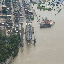

In [16]:
img

In [17]:
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=model.predict_classes(x)
pred

array([2], dtype=int64)

In [18]:
index=['Cyclone','Earthquake','Flood','Wildfire']
result=str(index[pred[0]])
result

'Flood'